In [2]:
#Gabriella Javinett - IS 605 Programming Final

#Import packages
import math
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

#Upload files
MTA_data1 = pd.read_csv('turnstile_jan_1.csv')
MTA_data2 = pd.read_csv('turnstile_jan_2.csv')
MTA_data3 = pd.read_csv('turnstile_jan_3.csv')
MTA_data4 = pd.read_csv('turnstile_jan_4.csv')

#Combine files to one master sheet
data = [MTA_data1, MTA_data2, MTA_data3, MTA_data4]
combined = pd.concat(data)

#Test for successful concatination of data
combined.sort_values(by=['DATE'], inplace=True, ascending=False)
combined.head(10) #Show dates from the end of December
combined.tail(10)#Show dates from beinning of January

#Remove December 2019 dates
combined['YEAR'] = pd.DatetimeIndex(combined['DATE']).year
January_FULL = combined[combined.YEAR != 2019]

#Definition of Activity = Combination of both 'Entries' and 'Exits'
#Create new column for Activity which adds the 'Entries' and 'Exits' columns 
January_FULL['ACTIVITY'] = January_FULL.sum(axis=1)

#Create New DataFrame with only the 'Station' and 'Activity'
January_Condensed = January_FULL[['STATION','ACTIVITY']]

#Add all 'Activity' for each 'Station
January_StationActivity = January_Condensed.groupby(['STATION'])['ACTIVITY'].sum()

#Identify Top 5 Stations
January_StationActivity.sort_values(inplace=True, ascending=False)
TOP = January_StationActivity.head(5)

#PRINT TOP 5 STATIONS
print('These are the top 5 busiest station during the month of January 2020:')
print (TOP)

These are the top 5 stations for activity during the month of January 2020.
STATION
42 ST-PORT AUTH    1985241982358
34 ST-HERALD SQ    1627174307546
23 ST              1543537362968
TIMES SQ-42 ST     1456307587938
125 ST             1432823330055
Name: ACTIVITY, dtype: int64


Text(0, 0.5, 'Activity Level (in trillions)')

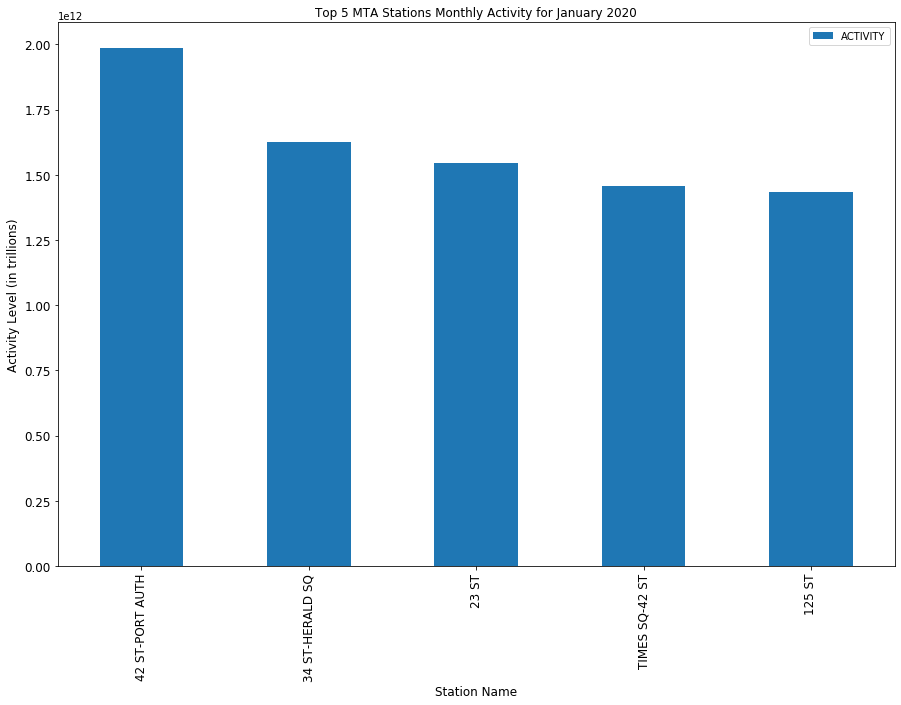

In [4]:
#BAR GRAPH WITH MONTHLY TOTALS FOR TOP 5 STATIONS
ax = TOP.plot(kind='bar', title='Top 5 MTA Stations Monthly Activity for January 2020', figsize=(15,10), legend=True, fontsize=12)
ax.set_xlabel('Station Name', fontsize=12)
ax.set_ylabel('Activity Level (in trillions)', fontsize=12)


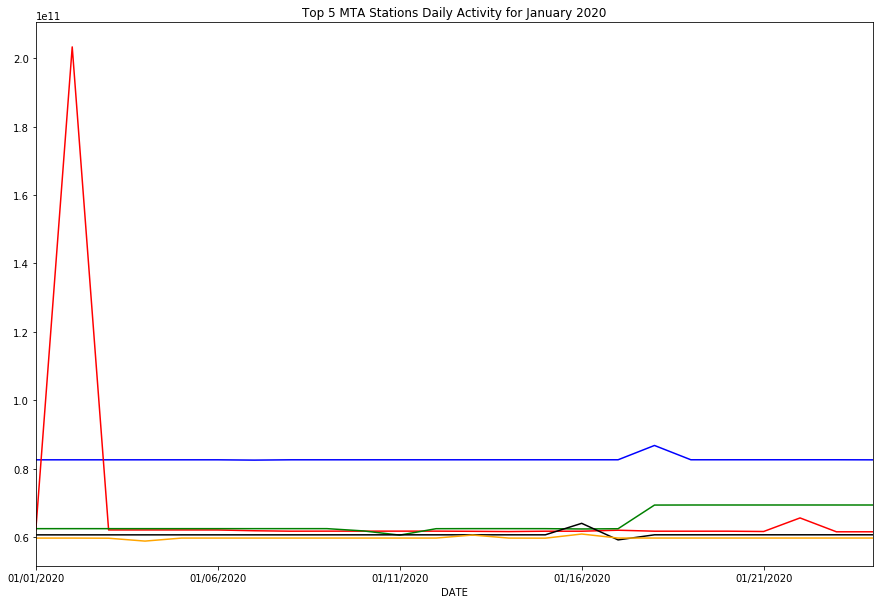

In [4]:
#ADD EACH TOP 5 STATION'S ACTIVITY BY DAY
PortAuth = January_FULL.loc[January_FULL['STATION'] == '42 ST-PORT AUTH']
PortAuth = PortAuth[['STATION','DATE','ACTIVITY']]
PortAuthDaily = PortAuth.groupby(['DATE'])['ACTIVITY'].sum()

HeraldSq = January_FULL.loc[January_FULL['STATION'] == '34 ST-HERALD SQ']
HealdSq = HeraldSq[['STATION','DATE','ACTIVITY']]
HeraldSqDaily = HeraldSq.groupby(['DATE'])['ACTIVITY'].sum()

TwentyThird = January_FULL.loc[January_FULL['STATION'] == '23 ST']
TwentyThird = TwentyThird[['STATION','DATE','ACTIVITY']]
TwentyThirdDaily = TwentyThird.groupby(['DATE'])['ACTIVITY'].sum()

TimesSq = January_FULL.loc[January_FULL['STATION'] == 'TIMES SQ-42 ST']
TimesSq = TimesSq[['STATION','DATE','ACTIVITY']]
TimesSqDaily = TimesSq.groupby(['DATE'])['ACTIVITY'].sum()

OneTwentyFive = January_FULL.loc[January_FULL['STATION'] == '125 ST'] 
OneTwentyFive = OneTwentyFive[['STATION','DATE','ACTIVITY']]
OneTwentyFiveDaily = OneTwentyFive.groupby(['DATE'])['ACTIVITY'].sum()

#LINE GRAPH WITH DAILY TOTALY FOR TOP 5 STATIONS
PortAuthDaily.plot(kind='line', x='DATE', y='ACTIVITY', title='Top 5 MTA Stations Daily Activity for January 2020', figsize=(15,10), color='blue')

HeraldSqDaily.plot(kind='line', x='DATE', y='ACTIVITY', title='Top 5 MTA Stations Daily Activity for January 2020', figsize=(15,10), color='red')

TwentyThirdDaily.plot(kind='line', x='DATE', y='ACTIVITY', title='Top 5 MTA Stations Daily Activity for January 2020', figsize=(15,10), color='green')

TimesSqDaily.plot(kind='line', x='DATE', y='ACTIVITY', title='Top 5 MTA Stations Daily Activity for January 2020', figsize=(15,10), color='black')

OneTwentyFiveDaily.plot(kind='line', x='DATE', y='ACTIVITY', title='Top 5 MTA Stations Daily Activity for January 2020', figsize=(15,10), color='orange')

plt.show()

#legend=True --> IN ORDER TO ADD LEGEND, NEED TO FIGURE OUT HOW TO CHANGE EACH STATION'S ACTIVITY (Y VALUE) TO READ '*STATION NAME*ACTIVITY'

These are the zip codes for the top 5 stations: 
Port Authority -  10036
Herald Square -  10001
23rd Street -  10011
Times Square -  10036
125th Street -  10035
This is the ZHVI for Port Authority:  
      RegionName  2020-01-31
723       10036    949577.0
This is the ZHVI for Herald Square:  
       RegionName  2020-01-31
1576       10001   1232125.0
This is the ZHVI for 23rd Street:  
     RegionName  2020-01-31
29       10011   1015501.0
This is the ZHVI for TimesSq:  
      RegionName  2020-01-31
723       10036    949577.0
This is the ZHVI for 125thStreet:  
       RegionName  2020-01-31
2216       10035    679495.0


Text(0, 0.5, 'Zillow Home Value Index')

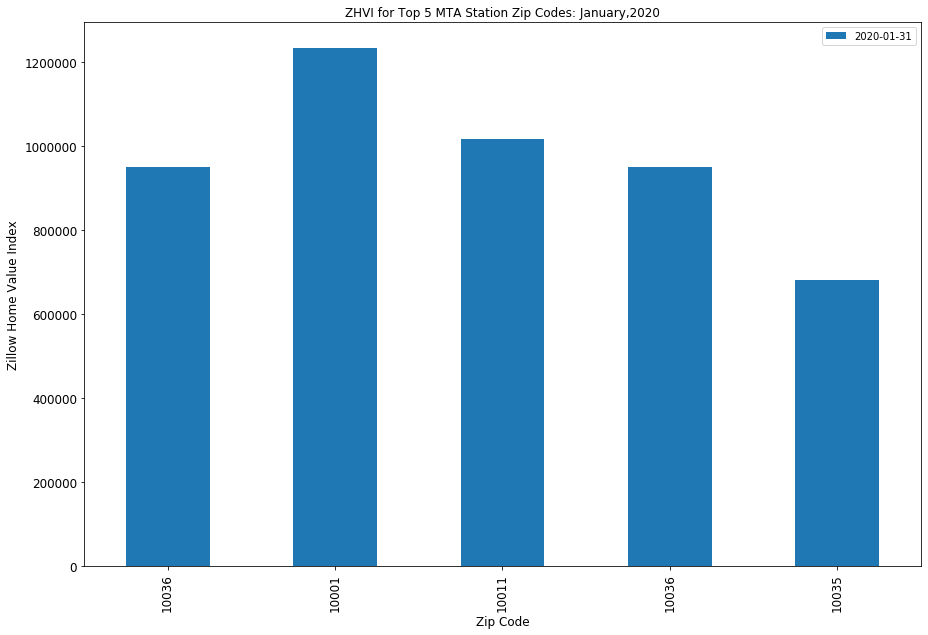

In [189]:
#ZILLOW HOME VALUE INDEX

#Top 5 Stations & Zip Codes
#42 ST-PORT AUTH    10036
#34 ST-HERALD SQ    10001
#23 ST              10011
#TIMES SQ-42 ST     10036
#125 ST             10035

PortAuth = 10036
HeraldSq = 10001
TwentyThird = 10011
TimesSq = 10036
OneTwentyFive = 10035

print('These are the zip codes for the top 5 stations: ')
print('Port Authority - ', PortAuth)
print('Herald Square - ', HeraldSq)
print('23rd Street - ', TwentyThird)
print('Times Square - ', TimesSq)
print('125th Street - ', OneTwentyFive)

#Import packages
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

#Upload file
ZHVI = pd.read_csv('Zip_Zhvi_AllHomes.csv')
ZHVI.head()

#Create new dataframe with only zip codes from New York
ZHVI_NY = (ZHVI.loc[ZHVI['StateName'] == 'NY'])
ZHVI_NY.head()

#Create new dataframe with only zip codes for the month of January 2020
cols = ['RegionName','2020-01-31']
ZHVI_NY_Jan = ZHVI_NY[cols]

#Create an array with the top 5 zip codes
PortAuth_ZHVI = ZHVI_NY_Jan.loc[ZHVI_NY_Jan['RegionName'] == PortAuth]
print('This is the ZHVI for Port Authority: ', '\n', PortAuth_ZHVI )

HeraldSq_ZHVI = ZHVI_NY_Jan.loc[ZHVI_NY_Jan['RegionName'] == HeraldSq]
print('This is the ZHVI for Herald Square: ', '\n', HeraldSq_ZHVI)

TwentyThird_ZHVI = ZHVI_NY_Jan.loc[ZHVI_NY_Jan['RegionName'] == TwentyThird]
print('This is the ZHVI for 23rd Street: ', '\n', TwentyThird_ZHVI)

TimesSq_ZHVI = ZHVI_NY_Jan.loc[ZHVI_NY_Jan['RegionName'] == TimesSq]
print('This is the ZHVI for TimesSq: ', '\n', TimesSq_ZHVI)

OneTwentyFive_ZHVI = ZHVI_NY_Jan.loc[ZHVI_NY_Jan['RegionName'] == OneTwentyFive]
print('This is the ZHVI for 125thStreet: ', '\n', OneTwentyFive_ZHVI)

#Combine into one dataframe
info = [PortAuth_ZHVI, HeraldSq_ZHVI, TwentyThird_ZHVI, TimesSq_ZHVI, OneTwentyFive_ZHVI]
Top_5_ZHVI = pd.concat(info)


#BAR GRAPH WITH ZHVI FOR ZIP CODES OF TOP 5 STATIONS
ax = Top_5_ZHVI.plot(kind='bar', title='ZHVI for Top 5 MTA Station Zip Codes: January,2020', figsize=(15,10), x='RegionName', y='2020-01-31',legend=True, fontsize=12)
ax.set_xlabel('Zip Code', fontsize=12)
ax.set_ylabel('Zillow Home Value Index', fontsize=12)